#Importing dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/Colab Notebooks/Machine Learning For Data Mining/EEG Data/S3.mat')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [0]:
print(len(mat))
print(mat)

In [0]:
import numpy as np 
import pandas as pd 
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

In [0]:
df=pd.DataFrame.from_dict(mat,orient='index')

print(df.head())

data=df[0].X_3D
print("------------------")
print(data)
print("------------------")

data=data.transpose(1,2,0)

print("------------------")
print(data[0])
print("------------------")

label=df[0].categoryLabels

y=np.transpose(label)

y=y-1

print("------------------")
print("y: ",y.shape)
print(y[0])
print("------------------")

print(len(data))

# Classify using LDA, RF, DT 

In [0]:
def classify(input_data,i):
  #print("-----------------------------------------------------------------------------------------------------------------------")
  #print("TIME SAMPLE ",i)
  #print()
  #print("initial shape of data: ",input_data.shape)

  x = StandardScaler().fit_transform(input_data)

  pca = PCA(n_components=0.95)
  principalComponents = pca.fit_transform(x)

  #print("Shape of data after PCA: ",principalComponents.shape)
  '''
  print("PCA explained varience ratio: ",pca.explained_variance_ratio_)
  plt.plot(pca.explained_variance_ratio_)
  plt.title('PCA Explained Variance Ratio')
  plt.grid(True)
  plt.show()
  '''

  X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.10)
  X_train=( X_train - (X_train.mean()) ) / X_train.std()
  X_test=( X_test - (X_test.mean()) ) / X_test.std()


  lda = LinearDiscriminantAnalysis()
  lda_components = lda.fit_transform(X_train,y_train.ravel())

  '''
  print("Shape of data after LDA: ",lda_components.shape)
  print("LDA explained variance ratio: ",lda.explained_variance_ratio_)
  plt.plot(pca.explained_variance_ratio_)
  plt.title('LDA Explained Variance Ratio')
  plt.grid(True)
  plt.show()

  plt.scatter(lda_components[:,0],lda_components[:,1])
  plt.title('Scatter Plot of 1st and 2nd LDA Components')
  plt.grid(True)
  plt.show()
  '''

  lda_mean_accuracy = lda.score(X_test,y_test)
  #print("Mean Accuracy of LDA: ",lda_mean_accuracy)

  dtc = DecisionTreeClassifier(random_state=0)
  dtc_components = dtc.fit(X_train,y_train.ravel())

  '''
  print("DTC feature importances: ",dtc.feature_importances_)
  plt.plot(dtc.feature_importances_)
  plt.title('DTC Feature Importance')
  plt.grid(True)
  plt.show()
  '''
  dtc_mean_accuracy = dtc.score(X_test,y_test)
  #print("Mean Accuracy of DTC: ", dtc_mean_accuracy)

  rfc = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=0)
  rfc_components = rfc.fit(X_train,y_train.ravel())

  '''
  print("RFC feature importances: ",rfc.feature_importances_)
  plt.plot(rfc.feature_importances_)
  plt.title('RFC Feature Importance')
  plt.grid(True)
  plt.show()
  '''

  rfc_mean_accuracy = rfc.score(X_test,y_test)
  #print("Mean Accuracy of RFC: ", rfc_mean_accuracy)
  
  print("-----------------------------------------------------------------------------------------------------------------------")
  print("Time ",i,": ","LDA: ",lda_mean_accuracy,"  ","DTC: ",dtc_mean_accuracy,"  ","RFC: ",rfc_mean_accuracy)

  return lda_mean_accuracy, dtc_mean_accuracy, rfc_mean_accuracy

In [0]:
lda=np.zeros([32])
dt=np.zeros([32])
rf=np.zeros([32])

print("Table of Mean Accuracy")
for i in range(0,32):
  lda[i],dt[i],rf[i] = classify(data[i],i)

Table of Mean Accuracy
-----------------------------------------------------------------------------------------------------------------------
Time  0 :  LDA:  0.17533718689788053    DTC:  0.1464354527938343    RFC:  0.1811175337186898
-----------------------------------------------------------------------------------------------------------------------
Time  1 :  LDA:  0.16377649325626203    DTC:  0.17533718689788053    RFC:  0.1676300578034682
-----------------------------------------------------------------------------------------------------------------------
Time  2 :  LDA:  0.1579961464354528    DTC:  0.13872832369942195    RFC:  0.17148362235067438
-----------------------------------------------------------------------------------------------------------------------
Time  3 :  LDA:  0.15606936416184972    DTC:  0.16377649325626203    RFC:  0.18497109826589594
-----------------------------------------------------------------------------------------------------------------------
T

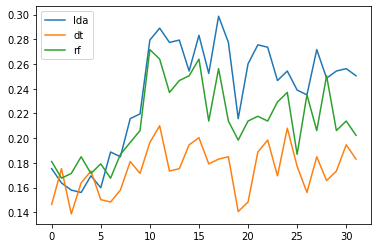

In [0]:
plt.figure()
plt.plot(lda,label='lda')
plt.plot(dt,label='dt')
plt.plot(rf,label='rf')
plt.legend()
plt.show()